{'Russian Federation': 89.4185264529743, 'China': 95.8923614069453, 'India': 78.3885599466666, 'United States': 99.631610907923, 'Indonesia': 88.156880601993}


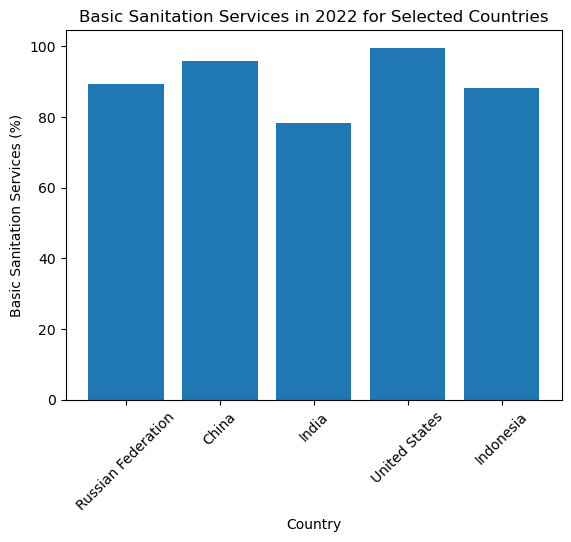

In [9]:
import requests
import matplotlib.pyplot as plt

# List of 5 most polluted country codes
countries = ['RU', 'CN', 'IN', 'US', 'ID']

# Indicator for basic sanitation services
indicator = 'SH.STA.BASS.ZS'

# Base URL for the World Bank API
base_url = "https://api.worldbank.org/v2/country/{}/indicator/{}?date=2022:2022&format=json"

sanitation_data = {}

# Function to fetch data for each country
def fetch_sanitation_data(country_code, indicator):
    url = base_url.format(country_code, indicator)
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        # Check if data is available and save the relevant information
        if data and len(data) > 1 and data[1]:
            latest_data = data[1][0]
            country_name = latest_data['country']['value']
            sanitation_value = latest_data['value']
            sanitation_data[country_name] = sanitation_value
        else:
            print(f"No data available for 2022 for country: {country_code}")
    else:
        print(f"Error fetching data for country: {country_code}, Status Code: {response.status_code}")


for country in countries:
    fetch_sanitation_data(country, indicator)


print(sanitation_data)

# Plot the data
plt.bar(sanitation_data.keys(), sanitation_data.values())
plt.xlabel('Country')
plt.ylabel('Basic Sanitation Services (%)')
plt.title('Basic Sanitation Services in 2022 for Selected Countries')
plt.xticks(rotation=45)
plt.show()
